# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Rohitashwa Chakraborty

EID: rc47878

Name: Sahitya Sundar Raj Vijayanagar

EID: sv25849

***

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


## Gradient Descent Code (Class)

In [2]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.prev_update = np.zeros(num_of_coefs)
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum
        return

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = (self.gama*self.cache) + ((1-self.gama)*(gradient**2))
        
        decay = self.cache + self.eps
        learning_coef = (self.learning_rate/np.sqrt(decay))
        
        # Simple SGD implementation
        self.coef -= np.multiply(learning_coef,gradient)
        
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*(self.coef[1:]**2))*(self.learning_rate)
        return
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        # Simple SGD implementation
        update = (gradient*self.learning_rate + self.mu*self.prev_update)
        self.coef -= update
        self.prev_update = update
        
        # regularizing all except the w0 term
        self.coef[1:] -= (self.regularization*(self.coef[1:]**2))*(self.learning_rate)

        return
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        mse = np.zeros(self.n_epoch)
        coefficients = np.array([np.zeros(self.coef.shape[0])]*self.n_epoch)
        
        X = self.get_features(X = X)

        grad = np.zeros(self.coef.shape[0])

        for epoch in range(0,self.n_epoch):
            
            for i in range(X.shape[0]):
                # Compute error
                hypothesis = self.linearPredict(X[i]) # Predicted Y
                error = hypothesis - y[i]
                # Compute gradients
                grad = error*X[i]
                # Update weights
                if update_rule == "sgd_momentum":
                    self.sgd_momentum(gradient= grad)
                elif update_rule == "RMSprop":
                    self.rmsprop(gradient= grad)
                else:
                    raise Exception("Update Rule {rule} is invalid. Please choose either 'bgd', 'sgd_momentum', 'RMSprop'")
        
            coefficients[epoch] = self.coef.copy()
            residuals = y - self.linearPredict(X)         
            mse[epoch] = np.mean(residuals**2)
        
        if plot:
            fig, ax = plt.subplots(1,2, sharex= True, sharey=False)
            fig.set_size_inches(30, 10,  forward=True)
            
            ax[1].plot(range(1,self.n_epoch+1),mse)
            ax[1].set_xlabel('epoch', fontsize = "16")
            ax[1].set_ylabel('MSE', fontsize = "16")
            
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,0],label='w0')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,1],label='w1')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,2],label='w2')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,3],label='w3')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,4],label='w4')
            ax[0].plot(range(1,self.n_epoch+1),coefficients[:,5],label='w5')
            ax[0].legend()
            ax[0].set_xlabel('epoch', fontsize = "16")
            ax[0].set_ylabel('parameter value', fontsize = "16")
            
            plt.suptitle("{method} ;Learning Rate: {learn}; Regularisation: {reg}".format(method = update_rule, learn = self.learning_rate, reg = self.regularization), fontsize = 25)

            plt.show()
        return mse[-1]

    def get_features(self, X):
       x = np.zeros((X.shape[0], self.coef.shape[0]))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''
       return np.dot(X_features, self.coef.T)

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

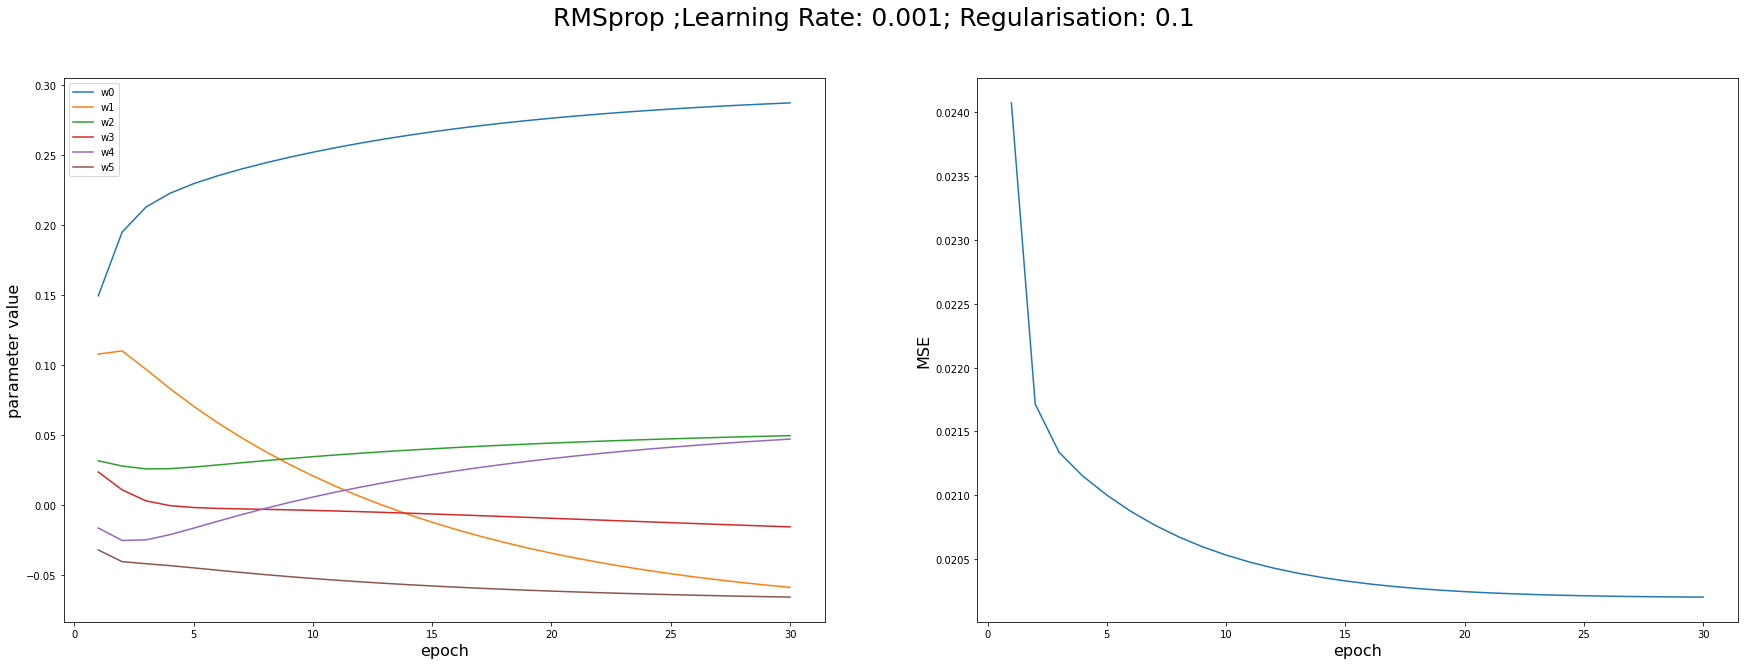

0.020200776445826265

In [4]:
lreg = LinearRegression(0.001,0.1,30)
lreg.fit(X,y,"RMSprop", plot=True)

## RMSProp : 2 Lowest MSE

In [5]:
update_rule = "RMSprop"
MSE = pd.DataFrame(index=regularization, columns=learning_rate)
for learn in learning_rate:
    for reg in regularization:
        linReg = LinearRegression(learning_rate=learn, regularization= reg, n_epoch= n_epochs)
        MSE[learn][reg] = linReg.fit(X,y, update_rule= update_rule)
        # print("Lowest MSE: ",linReg.fit(X,y, update_rule=update_rule))
MSE

0.0001    0.0010    0.0100    0.0500
0.00  0.021243  0.020203   0.02963  0.060413
0.01  0.021242  0.020203  0.029626  0.060715
0.10  0.021234  0.020201  0.029595       NaN

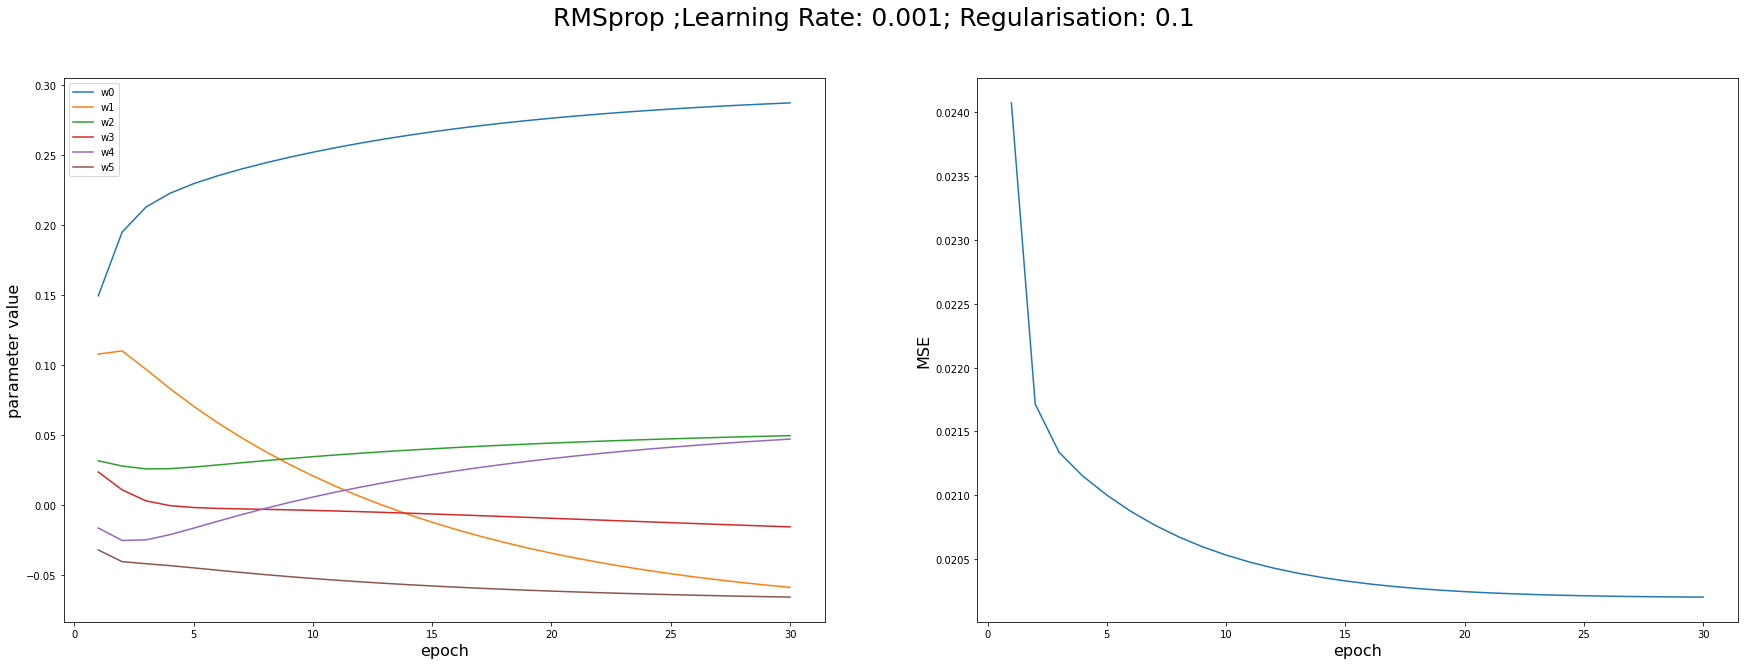

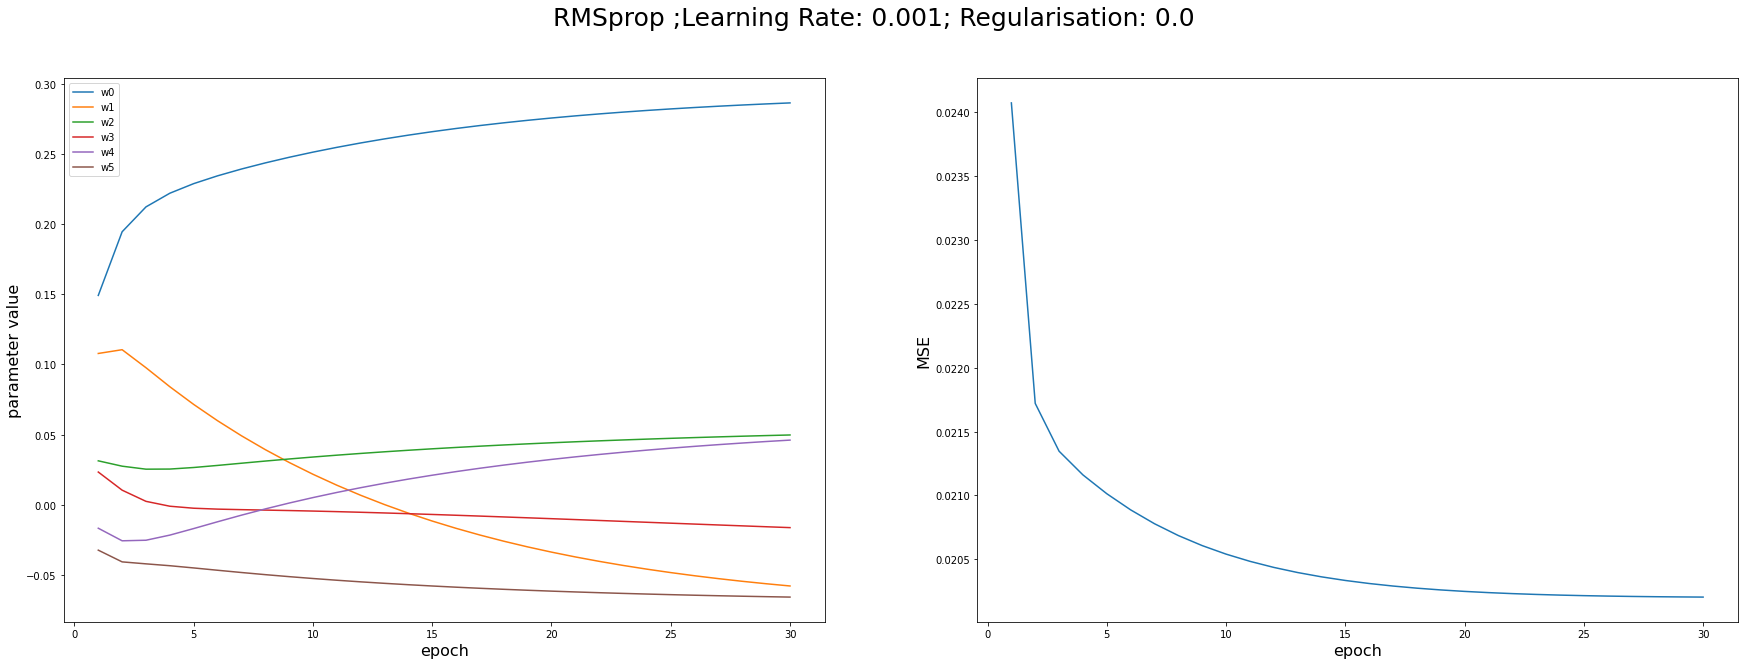

For Learning Rate: 0.0010; Regularisation: 0.10
Lowest MSE obtained at:  0.020200776445826265

For Learning Rate: 0.0001; Regularisation: 0.0
Second Lowest MSE obtained at:  0.020203078865835295


In [6]:
# Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.10

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.10, n_epoch= n_epochs)
rmsprop_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

# Second Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.00

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.0, n_epoch= n_epochs)
rmsprop2_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

print("For Learning Rate: 0.0010; Regularisation: 0.10\nLowest MSE obtained at: ",rmsprop_mse)
print("\nFor Learning Rate: 0.0001; Regularisation: 0.0\nSecond Lowest MSE obtained at: ",rmsprop2_mse)

## SGD_Momentum : 2 Lowest MSE

In [7]:
update_rule = "sgd_momentum"
MSE = pd.DataFrame(index=regularization, columns=learning_rate)
for learn in learning_rate:
    for reg in regularization:
        linReg = LinearRegression(learning_rate=learn, regularization= reg, n_epoch= n_epochs)
        MSE[learn][reg] = linReg.fit(X,y, update_rule= update_rule)
        # print("Lowest MSE: ",linReg.fit(X,y, update_rule=update_rule))
MSE

0.0001    0.0010    0.0100 0.0500
0.00  0.020581  0.020196  0.297225    NaN
0.01  0.020581  0.020195  0.295629    NaN
0.10  0.020578  0.020195  0.282755    NaN

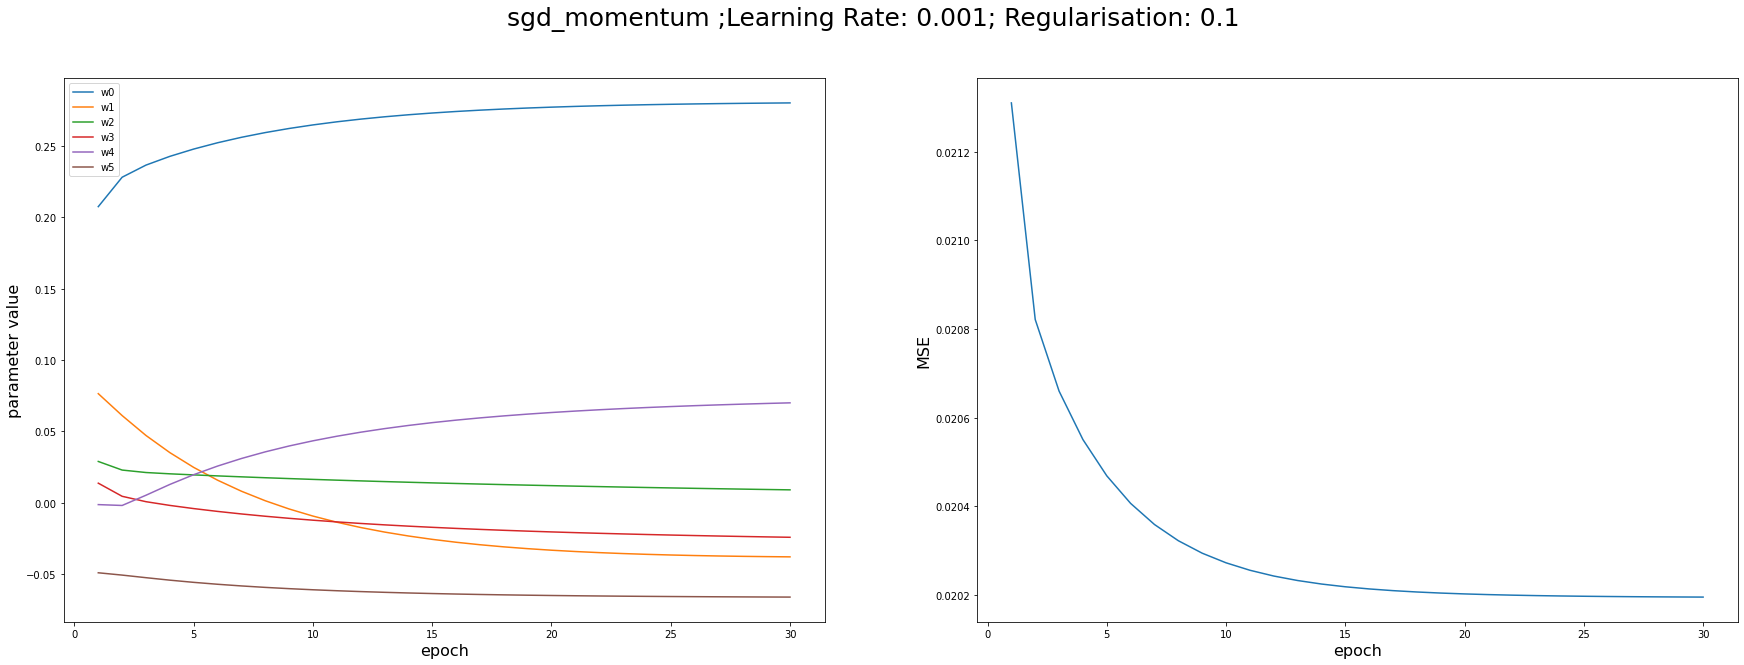

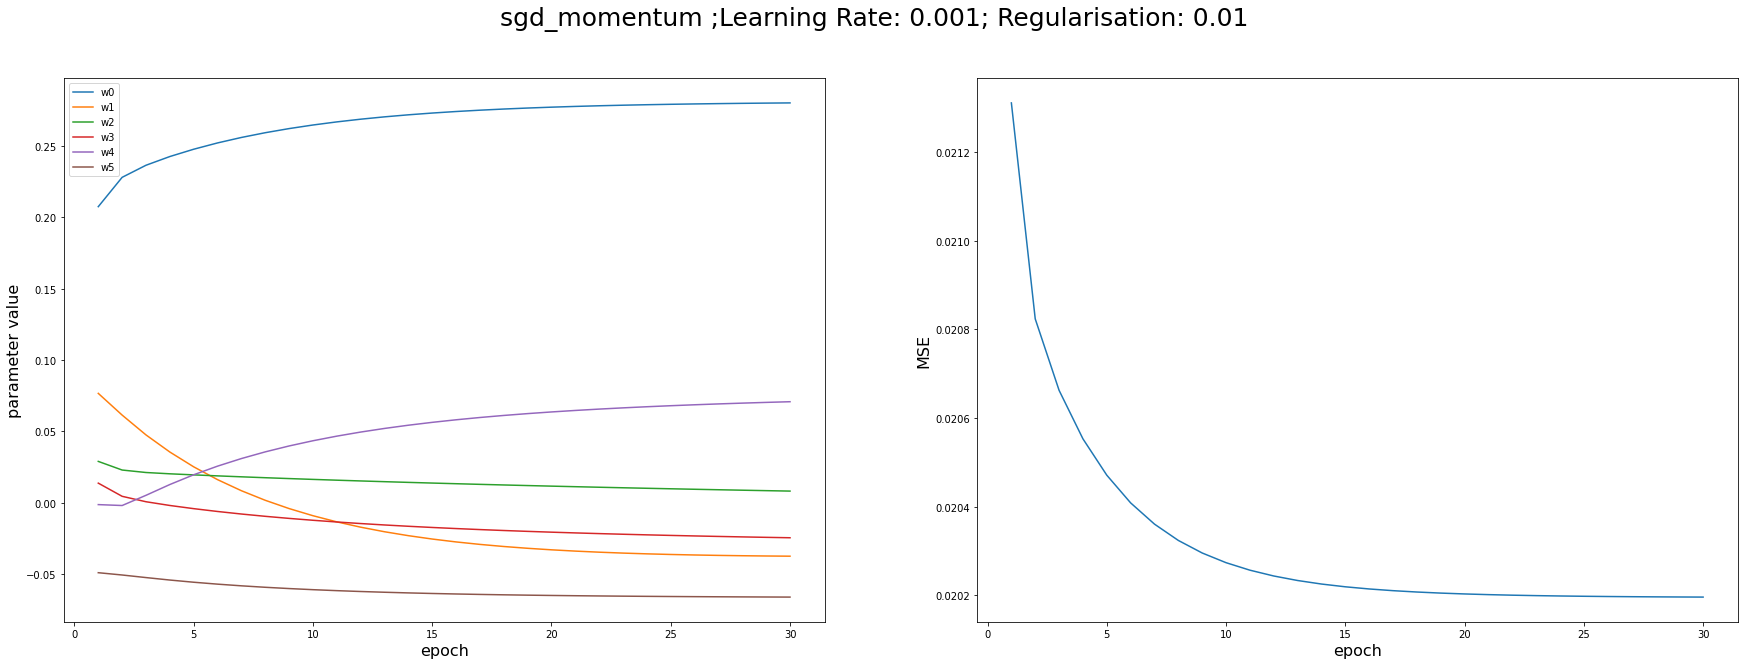

For Learning Rate: 0.0010; Regularisation: 0.10
Lowest MSE obtained at:  0.020195025546757405

For Learning Rate: 0.0001; Regularisation: 0.0
Second Lowest MSE obtained at:  0.02019548304385463


In [8]:
# Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.10

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.10, n_epoch= n_epochs)
sgd_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

# Second Minimum  MSE 
#   Learning Rate : 0.0010
#   Regularization: 0.01

linReg = LinearRegression(learning_rate=0.0010, regularization= 0.01, n_epoch= n_epochs)
sgd2_mse = linReg.fit(X,y, update_rule=update_rule, plot = True)

print("For Learning Rate: 0.0010; Regularisation: 0.10\nLowest MSE obtained at: ",sgd_mse)
print("\nFor Learning Rate: 0.0001; Regularisation: 0.0\nSecond Lowest MSE obtained at: ",sgd2_mse)

## Comparision b/w RMSprop and SGD_Momentum

### SGD Momemtum

The update function is defined as:

$$v_t = \gamma.v_{t-1} + \eta.\nabla_\theta J(\theta)$$
$$ \theta = \theta - v_t $$

The SGD Momentum function accelarates learning in the direction of the gradient and dampens oscillations by including a fraction ($\gamma$) of the previous gradient vector.

Thus, if the gradient vector points in the same direction over subsequent updates, learning rate is increases over each iteration while the learning rate decreases if the gradient's direction changes, due to momentum.

### RMSProp

The update function of RMSProp is defined as:

$$E[g^2]_t = \gamma.E[g^2]_{t-1} + (1-\gamma).g^2_t$$

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]}}.g_t$$

RMSProp, divides the learning rate by an exponentially decaying function.

In terms of performance, we observe that RMSProp has a sharper drop in MSE Scores over subsequent epochs.


In [9]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

## a) **(4 pts)** 

Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

### Answer

**Tanh**

**Train Losses:** 0.156 
**Test Losses:** 0.143

**Linear**

**Train Losses:** 0.495
**Test Losses:** 0.489

***Tanh*** outperforms ***Linear*** activation function by a large margin. Linear activation function is essentially useless and prforms at par with a random predictor.
Tanh also has more pronounced decision boundaries than Linear activation function.

This could be because of the tanh's non-linear activation function which enables it to be more flexible in adapting to the dataset


We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

## b) **(4 pts)** 
Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

### Answer

**4 hidden layer perceptron**

**Train Losses:** 0.035 
**Test Losses:** 0.055

**8 hidden layer perceptrons**

**Train Losses:** 0.007
**Test Losses:** 0.019

Clearly, as the number of neurons increase in the hidden layer, the complexity of the decision boundaries increases and the model gets better.

This could be because as the number of neurons increase, the model becomes more flexible and can discern more complex features. Even though the inputs were just two linear features $X_1$ and $X_2$, the decision boundary is way more flexible

## c) **(4 pts)** 
Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

## Answer

We observe that:

- When the learning rate it very high (= 10), the model does not really converge to matter how many epocs you run it for. This is evident from the test and train error for both 100 and 1000 epochs which is ≈ 0.5 (random)

- When the learning rate is very low (≈0.001), the model takes too long to converge. We observe that even after a 100 epichsm the error is close to 0.5 whereas with a lower learning rate, some models already reach 0.098 train error by that time. With a very small learning rate, the training error at 1000 epochs is still 0.097 and the learning doesn't stop.

Thus, we need to choose a sweet spot for the learning rate. Not too lobigng, and not too small.

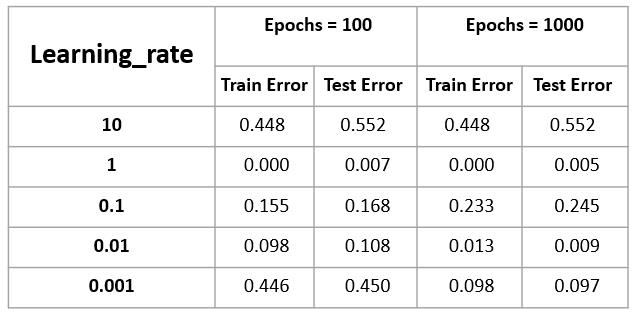

In [10]:
from IPython import display
display.Image("https://raw.githubusercontent.com/rohitashwachaks/MIS-382N-Adv.-Machine-Learning/main/assignment/HW3/2c-table.jpg")

## d) **(3 pts)** 
Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc

## Answer

**Best Train Loss:** 0.000

**Best Test Loss:** 0.000


Some of the most important things to consider while choosing your hyperparameters or features are:

- Features resemble the output.
    - This will enable you to build smaller models that will converge faster.

for example, in the picture below, we don't even need a machine learning model!! just a simple feature is enough to classify with 100% accuracy

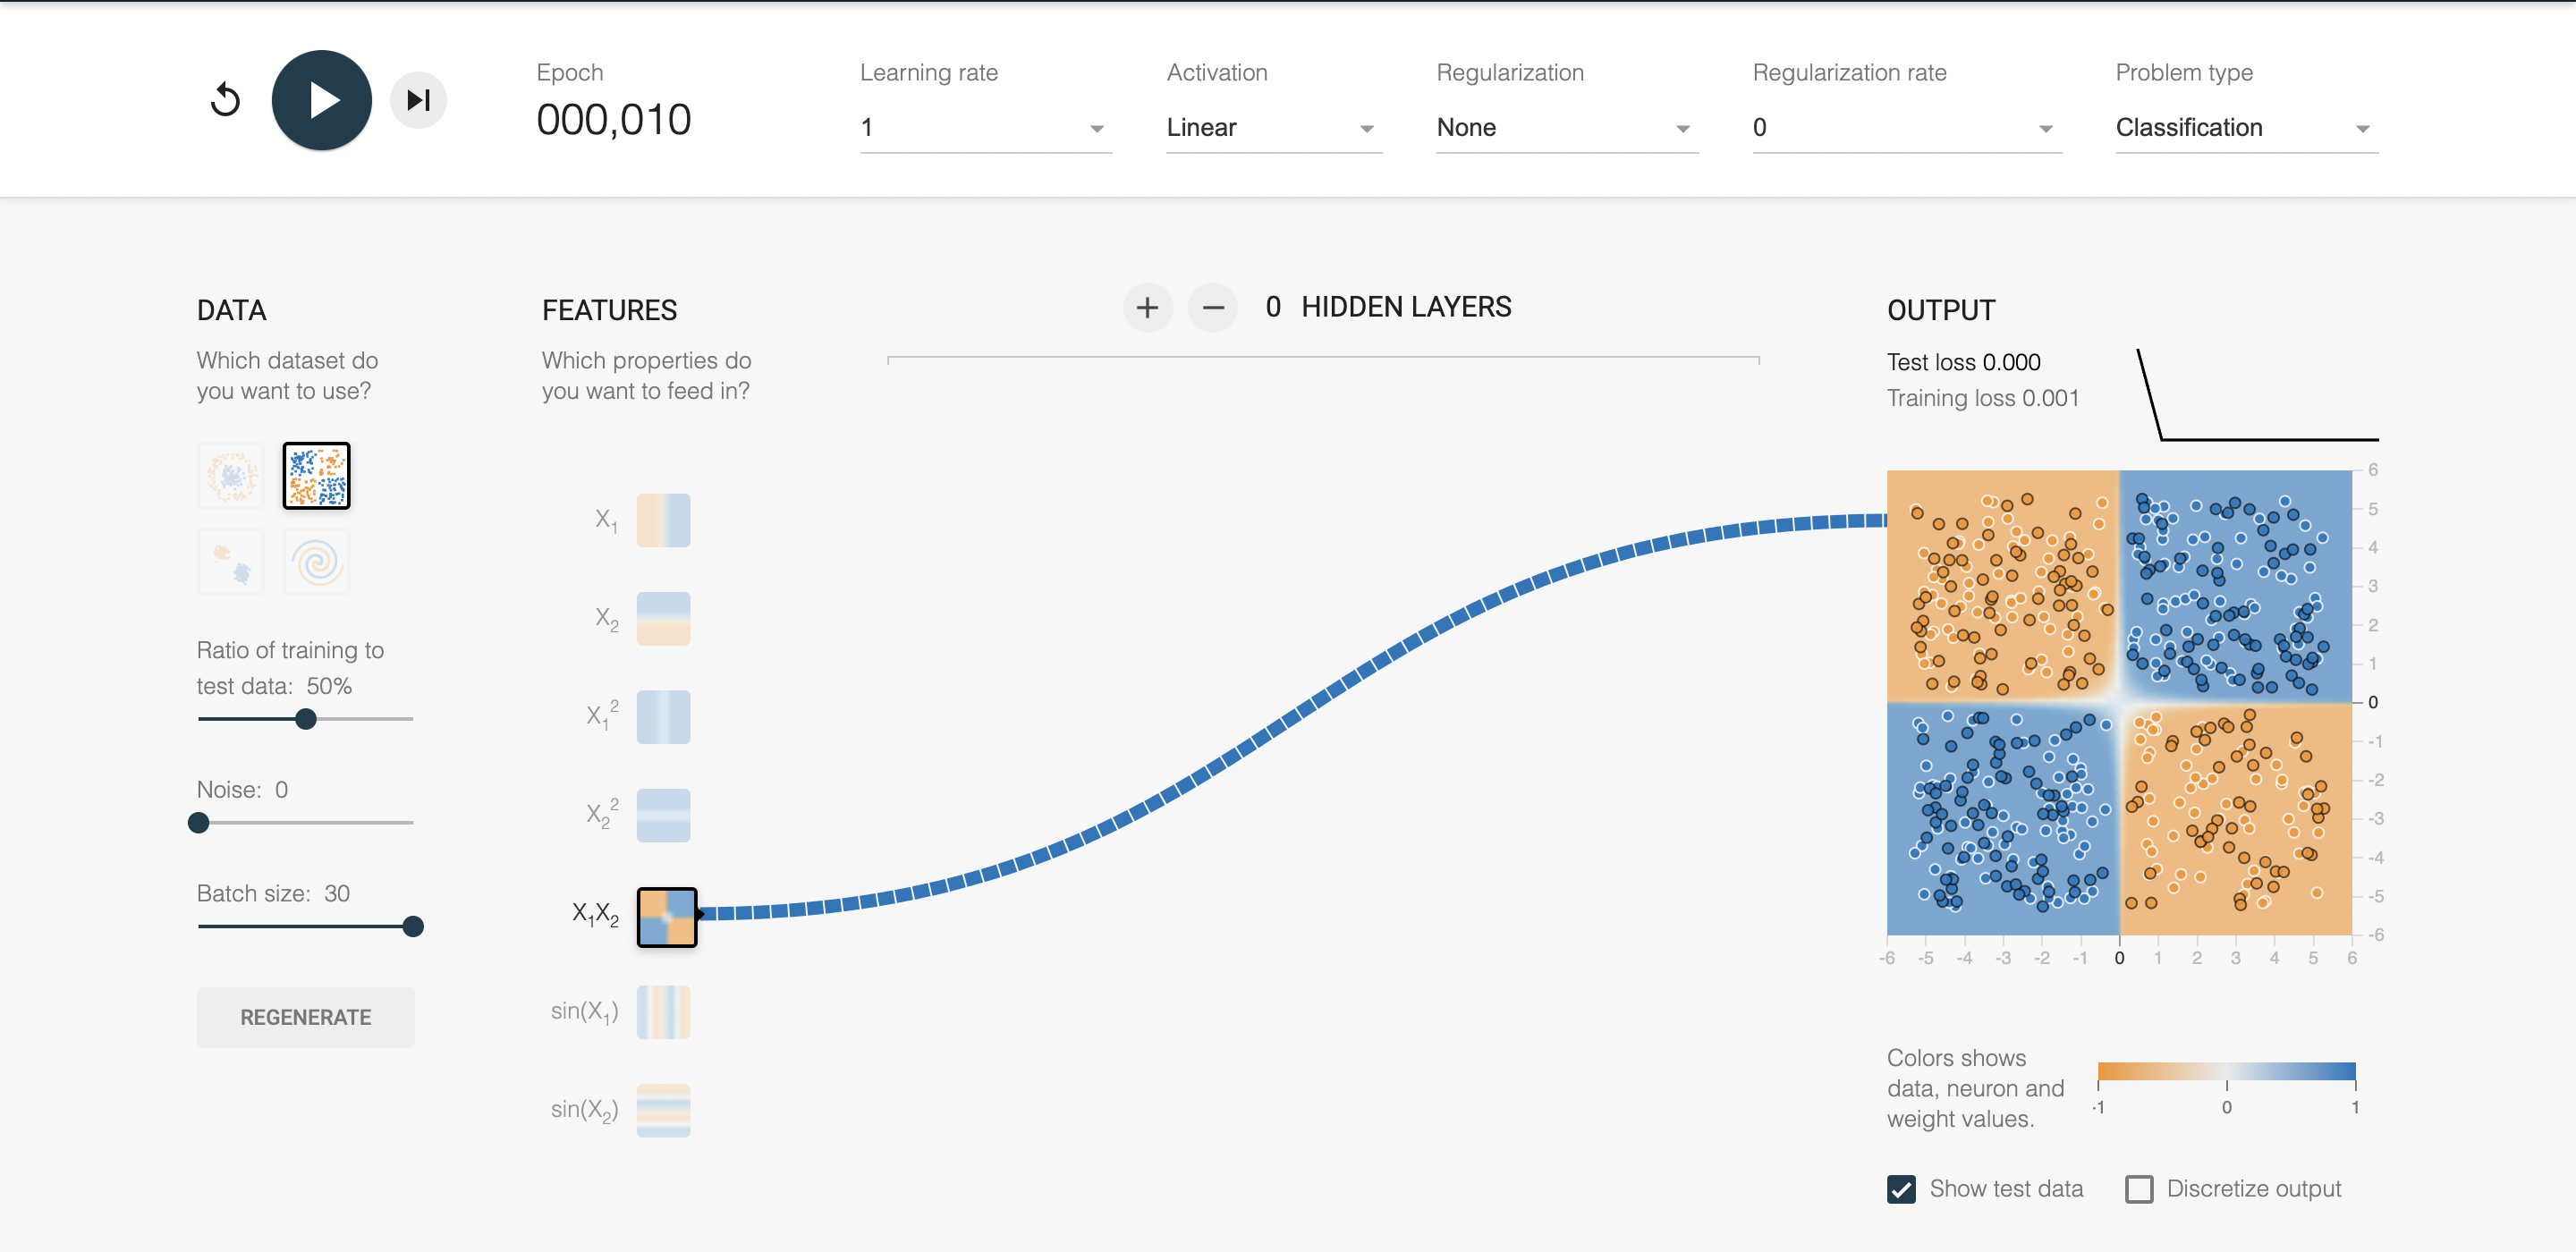

In [11]:
from IPython import display
display.Image("https://raw.githubusercontent.com/rohitashwachaks/MIS-382N-Adv.-Machine-Learning/main/assignment/HW3/2d-nomodel.png")

Other factors to consider is the model complexity (number of hidden layers and hidden layers per layer).
Deeper networks offer more flexibility to build complex models and extract more complex division boundaries

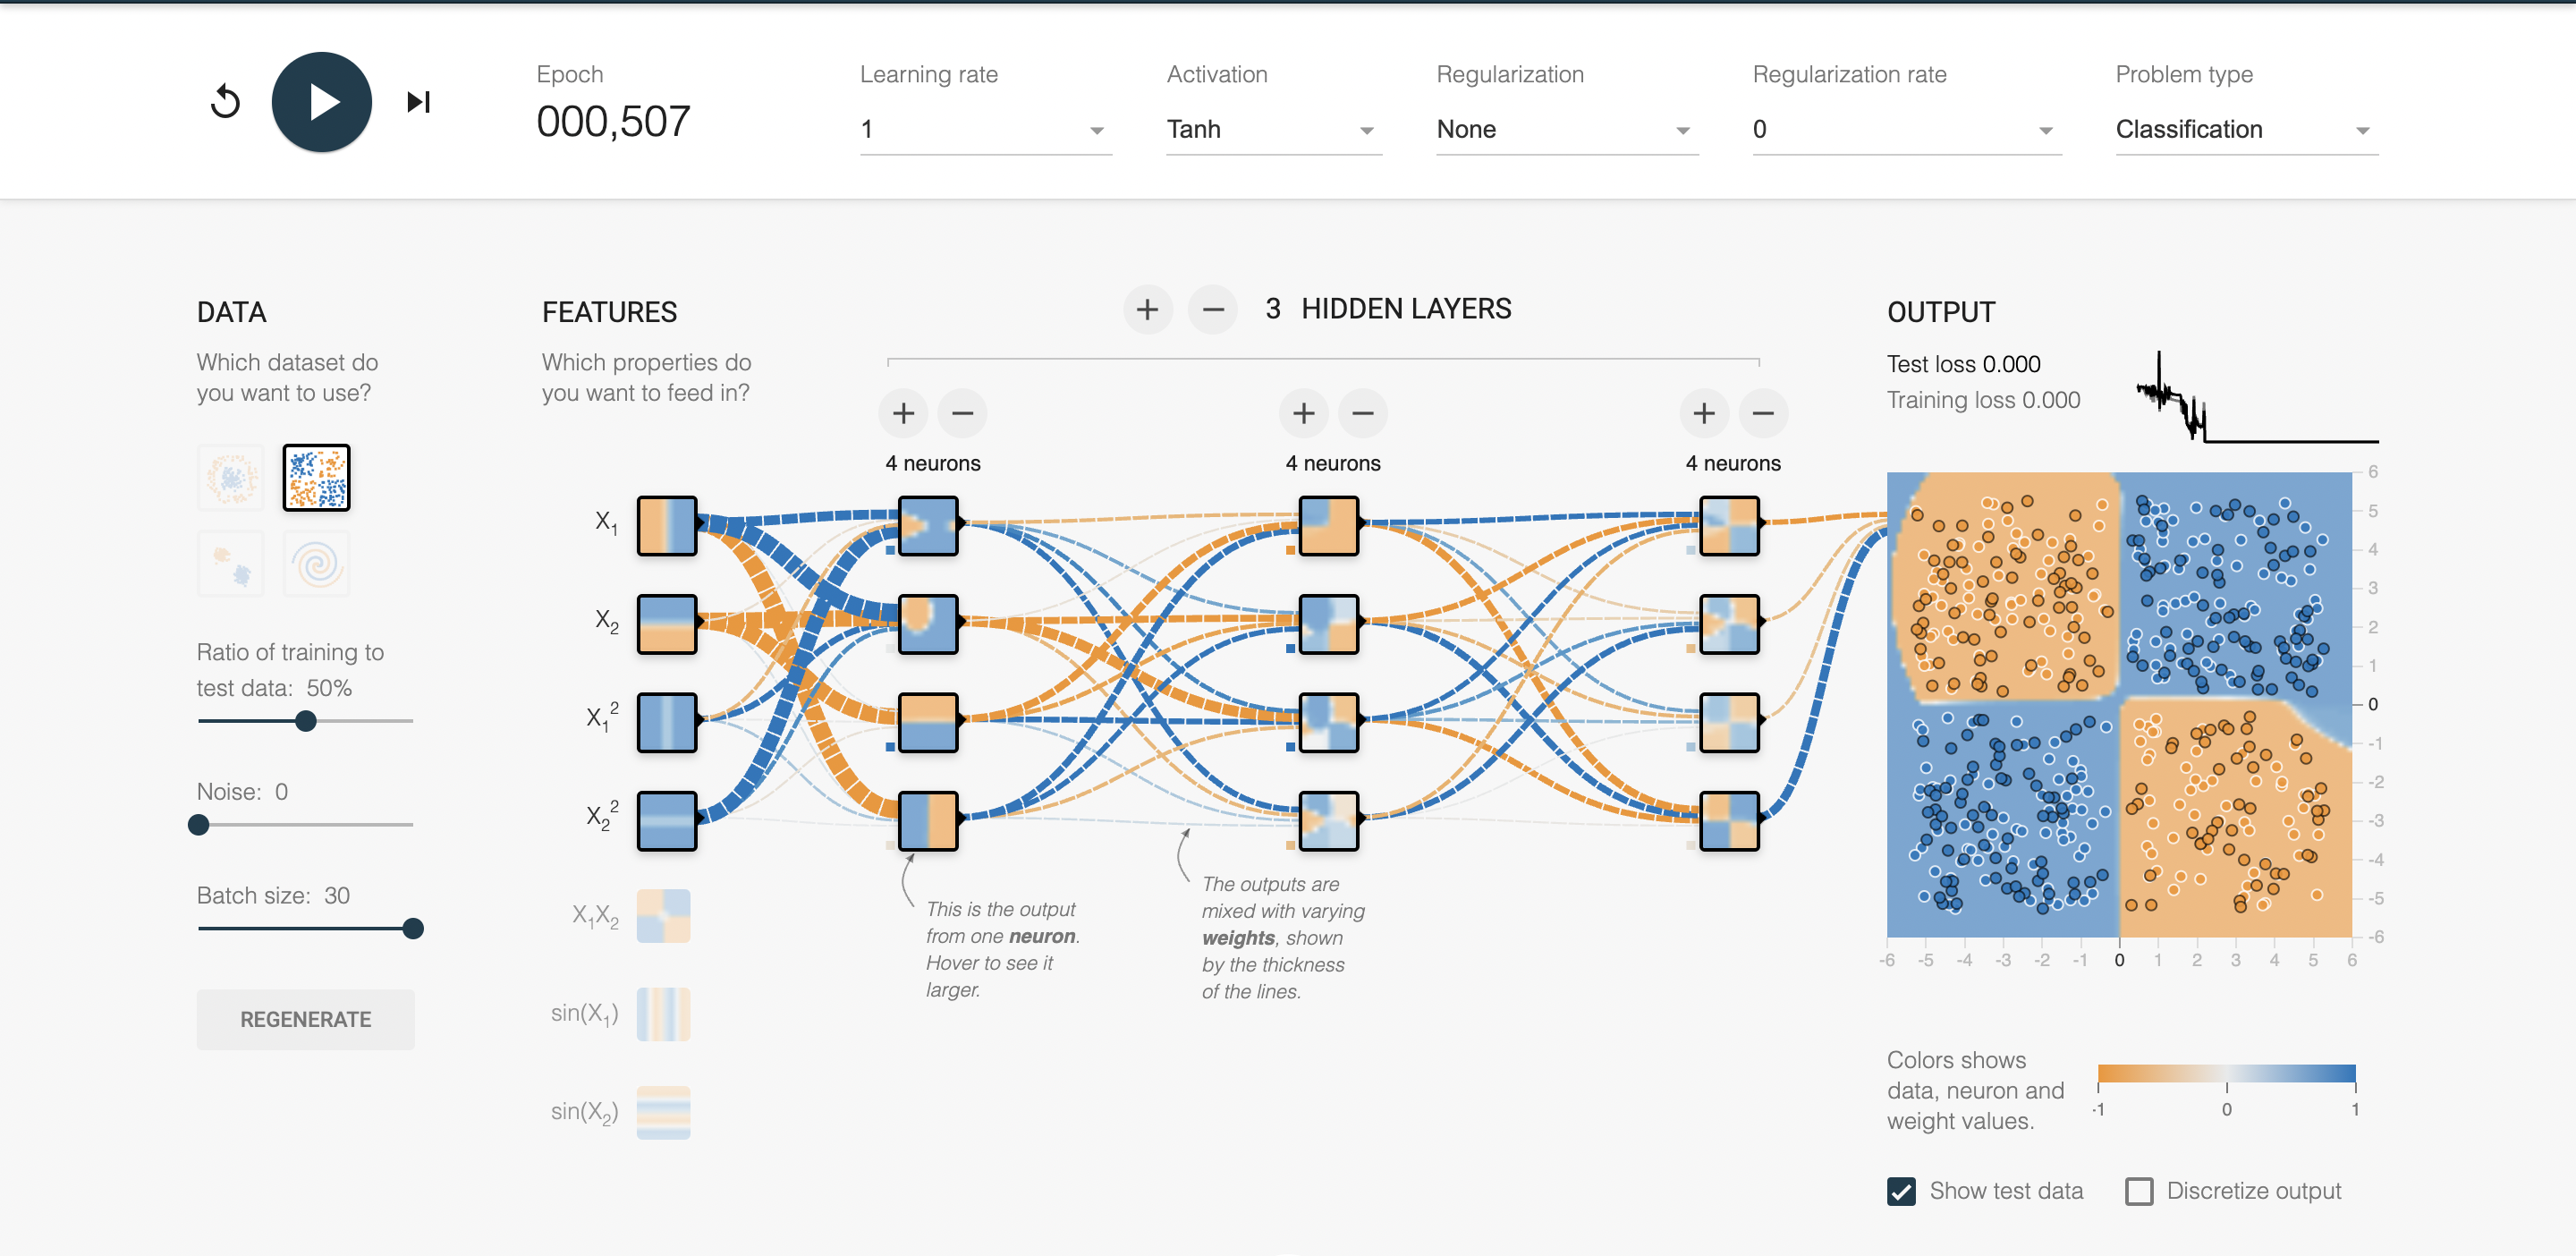

In [12]:
from IPython import display
display.Image("https://raw.githubusercontent.com/rohitashwachaks/MIS-382N-Adv.-Machine-Learning/main/assignment/HW3/2d-deep.png")

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [13]:
# install pyod using pip first
# !pip install pyod

In [14]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [15]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train
# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

y_train_mcd = clf.predict(X_train)
y_test_mcd = clf.predict(X_test)

In [16]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
y_pred = clf.decision_function(X_test)
evaluate_print(y = y_test, y_pred = y_pred, clf_name=clf)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


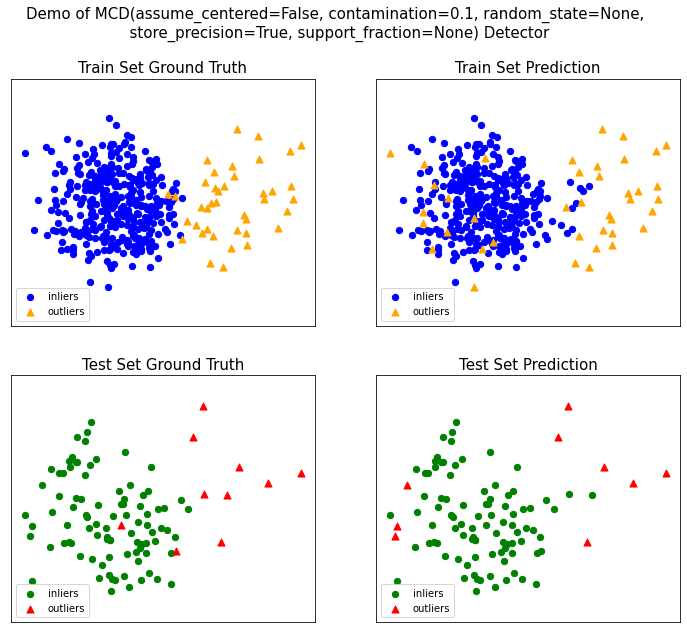

In [17]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test)# YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()
visualize(clf_name= clf,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_mcd,
        y_test_pred= y_test_mcd)
# YOUR CODE SHOULD COME HERE

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9167, precision @ rank n:0.7


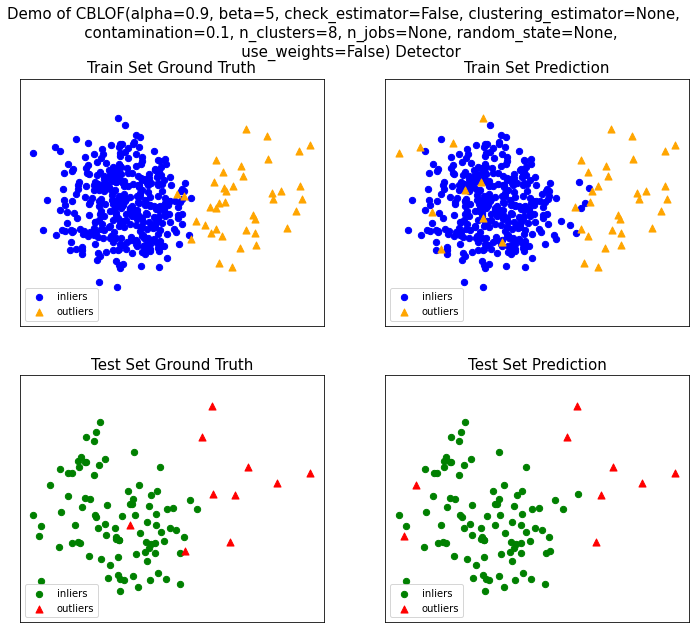

In [18]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

# ---CBLOF---
clf_cblof = CBLOF()
clf_cblof.fit(X_train)

y_train_cblof = clf_cblof.predict(X_train)
y_test_cblof = clf_cblof.predict(X_test)

y_test_score_cblof = clf_cblof.decision_function(X_test)
evaluate_print(clf_name= clf_cblof,y = y_test, y_pred = y_test_score_cblof)

visualize(clf_name= clf_cblof,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_cblof,
        y_test_pred= y_test_cblof)

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


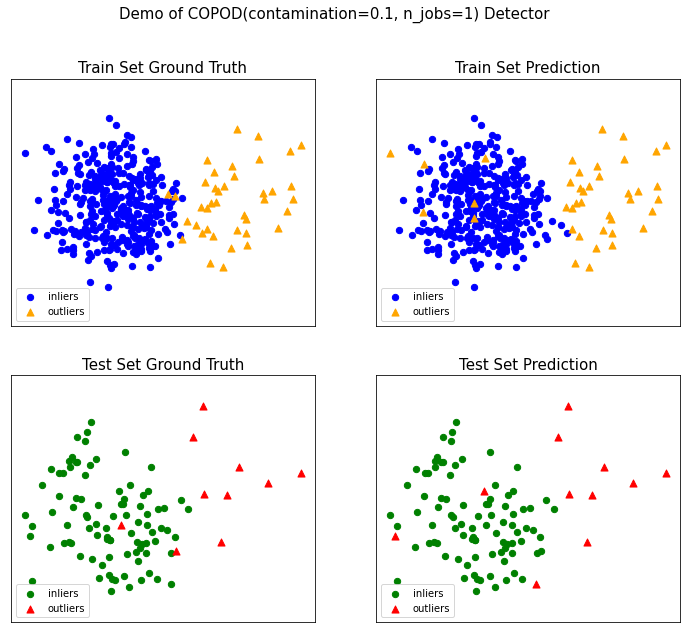

In [19]:
# ---COPOD---
clf_copod = COPOD()
clf_copod.fit(X_train)

y_train_copod = clf_copod.predict(X_train)
y_test_copod = clf_copod.predict(X_test)

y_test_score_copod = clf_copod.decision_function(X_test)
evaluate_print(clf_name= clf_copod,y = y_test, y_pred = y_test_score_copod)

visualize(clf_name= clf_copod,
        X_train= train_principalComponents,y_train= y_train, 
        X_test= test_principalComponents, y_test = y_test,
        y_train_pred= y_train_copod,
        y_test_pred= y_test_copod)

# Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

All the three models have high measure of ROC, but the ROC for COPOD is highest among the three. It appears that in this case COPOD is doing the best job in distinguishing the outliers from the inliers.

The results also report higher precision for COPOD as compared to other models (80% for COPOD). We can interpret this as - if COPOD predicts a data point as an outlier, it is correct 80% of the time.

Comparing the plots for train predictions, the false positives (assuming outlier is the positive class) is way less for COPOD as compared to MCD and CBLOF. The false negatives are also lower.

Comparing the plots of test predictions, the false positives are higher in CBLOF as compared to MCD and COPOD. For both CBLOF and MCD, there are many data points in the test set that are being classified as inliers but are actually outliers (false negatives). For COPOD, we can see higher true positives and lower false negatives as comapred to other models. Overall, COPOD appears to be doing the best job in correctly predicting both inliers and outliers, which is also backed up by our ROC and Precision measures.

# Question 4: PCA Conceptual questions (5 pts)

Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:

Principle Component Analysis is a linear and unsupervised feature extraction technique which reduces the dimensions of the data while also retaining information about the original data. The goal of PCA is to find a vector onto which to project the data so as to minimise projection error. 

To reduce $\vec{x} \epsilon R^n$ to $\vec{x} \epsilon R^k$ where (k< n), we find k vectors: $u_1$, $u_2$, $u_3$, $...$, $u_k$, and map all $\vec{x}$ to the span of [$u_1$, $u_2$, $u_3$, $...$, $u_k$]

**Step -1** Calculating Covarience Matrix ($\Sigma$)

**Step -2** Compute eigen-Vectors of Covarience matrix ($\Sigma$) by performing a single valued decomposition on it.

**Step -3** To compute the k - vectors, take the first k columns of the U eigenvector matrix (each column represents a vector)

$ U = [u_1, u_2, u_3, ..., u_{k-1}, u_{k}, u_{k+1}, ..., u_n]$

**Step -4** Reduced vector $\vec{z} = \vec{x}*U[:,:k]$ where $\vec{z} \epsilon R^k ; \vec{x} \epsilon R^n $ and $U[:,:k] \epsilon R^{n X k}$

We use the the orthogonal projection as it gives us the optimal solution which minimizes the reconstruction loss. The eigen vectors of a covariance matrix are orthogonal due to the symmetry of the covariance matrix and hence we can select the best projection bases based on the covariance matrix of the data. So if we consider the general case of an M-dimensional projection space, the optimal linear projection for which the variance of the projected data is maximized is defined by the M eigenvectors of the data covariance matrix S corresponding to the M largest eigenvalues.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [20]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley  OverallQual  OverallCond  \
0          60       RL         65.0     8450   NaN            7            5   
1          20       RL         80.0     9600   NaN            6            8   
2          60       RL         68.0    11250   NaN            7            5   
3          70       RL         60.0     9550   NaN            7            5   
4          60       RL         84.0    14260   NaN            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ... 3SsnPorch  ScreenPorch  PoolArea  \
0       2003          2003       196.0  ...         0            0         0   
1       1976          1976         0.0  ...         0            0         0   
2       2001          2002       162.0  ...         0            0         0   
3       1915          1970         0.0  ...         0            0         0   
4       2000          2000       350.0  ...         0            0         0   

   PoolQC  Fence MiscFeature MiscVal MoSold  YrSold  SalePrice  
0     NaN    NaN         NaN       0      2    2008     208500  
1     NaN    NaN         NaN       0      5    2007     181500  
2     NaN    NaN         NaN       0      9    2008     223500  
3     NaN    NaN         NaN       0      2    2006     140000  
4     NaN    NaN         NaN       0     12    2008     250000  

[5 rows x 50 columns]


a) **(2 pts)** Print the number of NaN values in each column.


In [21]:
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [22]:
data_dm = data.copy()
data_dm["binned_yr_built"] = pd.cut(data_dm["YearBuilt"], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020],
                                    labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'],
                                    include_lowest=True)

In [23]:
data_dm = pd.get_dummies(data_dm, columns=["binned_yr_built"], prefix="Built")
data_dm.head()

MSSubClass MSZoning  LotFrontage  LotArea Alley  OverallQual  OverallCond  \
0          60       RL         65.0     8450   NaN            7            5   
1          20       RL         80.0     9600   NaN            6            8   
2          60       RL         68.0    11250   NaN            7            5   
3          70       RL         60.0     9550   NaN            7            5   
4          60       RL         84.0    14260   NaN            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ... MiscVal  MoSold  YrSold  \
0       2003          2003       196.0  ...       0       2    2008   
1       1976          1976         0.0  ...       0       5    2007   
2       2001          2002       162.0  ...       0       9    2008   
3       1915          1970         0.0  ...       0       2    2006   
4       2000          2000       350.0  ...       0      12    2008   

   SalePrice  Built_1900-1920 Built_1920-1940 Built_1940-1960 Built_1960-1980  \
0     208500                0               0               0               0   
1     181500                0               0               0               1   
2     223500                0               0               0               0   
3     140000                1               0               0               0   
4     250000                0               0               0               0   

   Built_1980-2000  Built_2000-2020  
0                0                1  
1                0                0  
2                0                1  
3                0                0  
4                1                0  

[5 rows x 56 columns]


c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [24]:
data_dm.drop(list(data_dm.columns[data_dm.isna().mean() > 0.65]), axis= 1, inplace= True)
data_dm.head()

MSSubClass MSZoning  LotFrontage  LotArea  OverallQual  OverallCond  \
0          60       RL         65.0     8450            7            5   
1          20       RL         80.0     9600            6            8   
2          60       RL         68.0    11250            7            5   
3          70       RL         60.0     9550            7            5   
4          60       RL         84.0    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea ExterQual  ...  MiscVal  MoSold  \
0       2003          2003       196.0        Gd  ...        0       2   
1       1976          1976         0.0        TA  ...        0       5   
2       2001          2002       162.0        Gd  ...        0       9   
3       1915          1970         0.0        TA  ...        0       2   
4       2000          2000       350.0        Gd  ...        0      12   

   YrSold  SalePrice Built_1900-1920 Built_1920-1940 Built_1940-1960  \
0    2008     208500               0               0               0   
1    2007     181500               0               0               0   
2    2008     223500               0               0               0   
3    2006     140000               1               0               0   
4    2008     250000               0               0               0   

   Built_1960-1980  Built_1980-2000  Built_2000-2020  
0                0                0                1  
1                1                0                0  
2                0                0                1  
3                0                0                0  
4                0                1                0  

[5 rows x 52 columns]


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [25]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print("Sample Mean:", round(sample_ages.mean(),2))
#Population mean
print("Population Mean:", round(data_dm["SalePrice"].mean(),2))

Sample Mean: 178292.63
Population Mean: 180921.2


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [26]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
sample_std = sample.std()
z_critical = 1.96#*sample_std/sample_mean    # 95% ≈ 1.96 standard deviations

#Get population standard deviation
pop_stdev = data_dm["SalePrice"].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
print("True mean value: {mean}\n95% confidence interval: {lower_bound} - {upper_bound}".format(mean = sample_mean,
                                                                                            lower_bound = round(confidence_interval[0],5),
                                                                                            upper_bound = round(confidence_interval[1],5)))


True mean value: 182092.53
95% confidence interval: 166521.79943 - 197663.26057


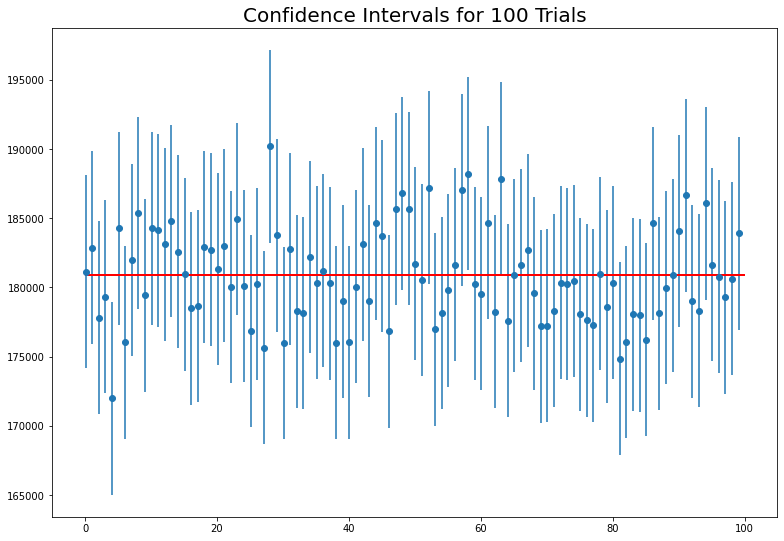

In [27]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value
    sample_std = sample.std()
    z_critical = 1.96#*sample_std/sample_mean    # 95% ≈ 1.96 standard deviations

    #Get population standard deviation
    pop_stdev = data_dm["SalePrice"].std()

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for bot,top in intervals],
             fmt='o')

# plt.hlines(xmin=0, xmax=25,
plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

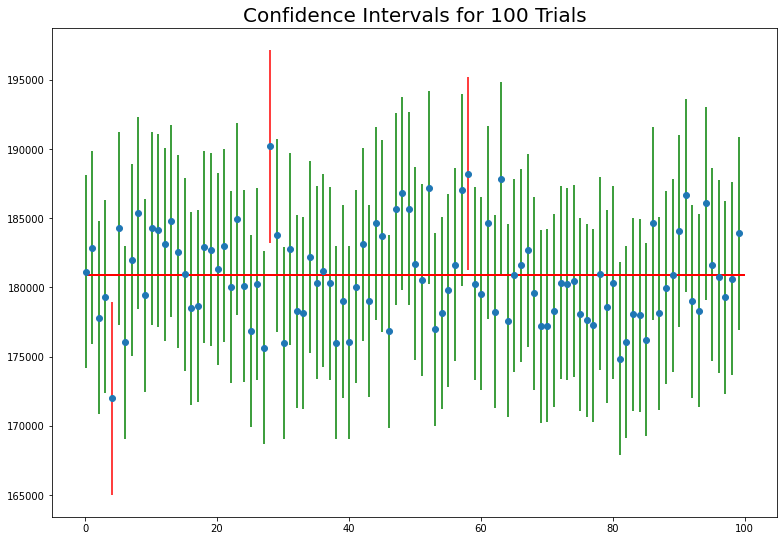

In [28]:
pop_mean = data['SalePrice'].mean()

pos_sample = []
pos_yerr = []

neg_sample = []
neg_yerr = []

for index, (bot, top) in enumerate(intervals):
    if ((top - pop_mean)*(bot - pop_mean) < 0):
        pos_sample.append(sample[index])
        pos_yerr.append((top-bot)/2)
    else:
        neg_sample.append(sample[index])
        neg_yerr.append((top-bot)/2)

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr= [(top-bot)/2 for bot,top in intervals],
             ecolor=["green" if (top - pop_mean)*(bot - pop_mean) < 0 else "red" for bot,top in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=pop_mean, 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

## Interpretation
We observe that when we 